In [1]:
# import all libraries that we will need for our analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import our data file and alias for referencing: df
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
# get a feel for shape of our data
# we have 180 rows (or records) and 9 columns
df.shape

(180, 9)

In [4]:
# I will need to change some datatypes and do one hot encoding if we plan to use for 
# regression or numerical analysis
# for now, I will leave the data types as is
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
# if I decide to update column data types later: 
#df[['MaritalStatus','Gender','Product']].astype('category')

In [6]:
# head to get a sense of what our data looks like
# returns first 5 rows by default
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
# last 5 records of our dataset
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [8]:
# take a random sample
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
35,TM195,26,Female,16,Partnered,4,3,52302,113
142,TM798,22,Male,18,Single,4,5,48556,200
158,TM798,26,Male,16,Partnered,5,4,64741,180
81,TM498,20,Male,14,Single,2,3,32973,53
119,TM498,32,Male,16,Partnered,3,3,53439,95
96,TM498,24,Female,16,Single,3,3,50028,106
124,TM498,33,Female,18,Single,3,4,47754,74
126,TM498,34,Male,16,Partnered,3,4,59124,85
50,TM195,29,Male,18,Partnered,3,3,68220,85
27,TM195,25,Female,14,Partnered,3,3,48891,75


### Observations
* We are dealing with a relatively small dataset - 180 rows by 9 columns
* Data includes product and demographic data for our retail sales
* Data looks clean, but we should check to make sure we are not missing values
* We should also be on the lookout for other anomalies that could impact our analysis

In [9]:
# we don't appear to be missing any data
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [116]:
# there doesn't appear to be any issues with duplicates
df.duplicated().sum()

0

In [117]:
# another way to get a concise overview of our data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Product           180 non-null    object  
 1   Age               180 non-null    int64   
 2   Gender            180 non-null    object  
 3   Education         180 non-null    int64   
 4   MaritalStatus     180 non-null    object  
 5   Usage             180 non-null    int64   
 6   Fitness           180 non-null    int64   
 7   Income            180 non-null    int64   
 8   Miles             180 non-null    int64   
 9   Fitness Category  180 non-null    category
 10  Usage Category    180 non-null    category
 11  Miles Category    180 non-null    category
 12  Income Category   180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.0+ KB


In [118]:
# this is a useful attribute for when we need to refresh our memories later on in our analysis
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Fitness Category', 'Usage Category',
       'Miles Category', 'Income Category'],
      dtype='object')

In [119]:
# we can use the describe method to get some summary statistics and information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [14]:
# just in case we want to include the non-numeric columns:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [15]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

### Note: 
* We have three products and our 195 model has sold the most
* We should dig deeper to determine if each model caters to different customer segments

In [120]:
# filter the df to include only TM195 data
df[df['Product'] == "TM195"].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [123]:
# looking at the variances from our overall dataset
df[df['Product'] == "TM195"].describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,-100.0,-0.238889,0.277954,0.0,-1.00,0.0,0.00,0.0
Education,-100.0,-0.534722,-0.400671,0.0,0.00,0.0,0.00,-3.0
Usage,-100.0,-0.368056,-0.302173,0.0,0.00,0.0,0.00,-2.0
Fitness,-100.0,-0.348611,-0.294328,0.0,0.00,0.0,-1.00,0.0
Income,-100.0,-7301.552778,-7430.901037,0.0,-5400.75,-3979.5,-5229.00,-36361.0
Miles,-100.0,-20.406944,-22.989503,17.0,0.00,-9.0,-20.75,-172.0


In [17]:
df[df['Product'] == "TM498"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [124]:
df[df['Product'] == "TM498"].describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,-120.0,0.111111,-0.298250,1.0,0.00,0.0,0.25,-2.0
Education,-120.0,-0.455556,-0.394503,0.0,0.00,0.0,0.00,-3.0
Usage,-120.0,-0.388889,-0.285080,0.0,0.00,0.0,-0.75,-2.0
Fitness,-120.0,-0.411111,-0.329099,0.0,0.00,0.0,-1.00,-1.0
Income,-120.0,-4745.927778,-7852.694838,2274.0,852.75,-1137.0,-5229.00,-37498.0
Miles,-120.0,-15.261111,-18.600470,0.0,-2.00,-9.0,-8.75,-148.0


In [18]:
df[df['Product'] == "TM798"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


In [125]:
df[df['Product'] == "TM798"].describe().T - df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,-140.0,0.311111,0.028240,4.0,0.75,1.0,-2.75,-2.0
Education,-140.0,1.752778,0.022011,2.0,2.00,2.0,2.00,0.0
Usage,-140.0,1.319444,-0.137804,1.0,1.00,2.0,1.00,0.0
Fitness,-140.0,1.313889,-0.291401,2.0,1.00,2.0,1.00,0.0
Income,-140.0,21721.997222,1999.152494,18994.0,14146.00,25972.0,32218.00,0.0
Miles,-140.0,63.705556,8.202940,59.0,54.00,66.0,85.25,0.0


In [20]:
df.pivot_table(index=['Product', 'Gender', 'MaritalStatus'], aggfunc='mean')

Age  Education   Fitness        Income  \
Product Gender MaritalStatus                                                 
TM195   Female Partnered      28.333333  14.888889  2.851852  46153.777778   
               Single         28.692308  15.538462  2.923077  45742.384615   
        Male   Partnered      31.380952  15.428571  2.857143  50028.000000   
               Single         25.631579  14.473684  3.263158  43265.842105   
TM498   Female Partnered      30.000000  15.200000  2.933333  49724.800000   
               Single         28.142857  15.214286  2.785714  48920.357143   
        Male   Partnered      30.380952  15.285714  2.904762  49378.285714   
               Single         25.200000  14.500000  3.000000  47071.800000   
TM798   Female Partnered      29.000000  17.500000  5.000000  84972.250000   
               Single         24.333333  18.333333  4.000000  58516.000000   
        Male   Partnered      30.000000  17.421053  4.631579  81431.368421   
               Single         28.928571  16.928571  4.642857  68216.428571   

                                   Miles     Usage  
Product Gender MaritalStatus                        
TM195   Female Partnered       74.925926  2.851852  
               Single          78.846154  3.000000  
        Male   Partnered       80.190476  3.285714  
               Single          99.526316  3.263158  
TM498   Female Partnered       94.000000  3.333333  
               Single          80.214286  2.928571  
        Male   Partnered       87.238095  2.857143  
               Single          91.100000  3.300000  
TM798   Female Partnered      215.000000  5.250000  
               Single         133.333333  4.666667  
        Male   Partnered      176.315789  4.842105  
               Single         147.571429  4.571429

<Figure size 1080x1080 with 0 Axes>

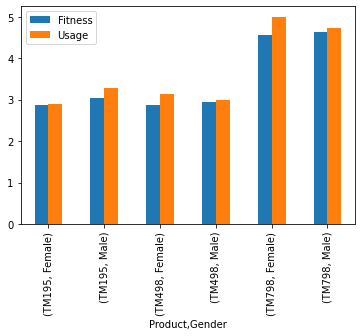

In [126]:
pg_pivot = df.pivot_table(index=['Product', 'Gender'], values=['Fitness', 'Usage'], aggfunc='mean')

plt.figure(figsize=(15,15))
ax = pg_pivot.plot(kind='bar')
plt.show()

In [127]:
# refreshing my memory on our column headers
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Fitness Category', 'Usage Category',
       'Miles Category', 'Income Category'],
      dtype='object')

In [24]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [25]:
pd.crosstab(index=df['Gender'], columns=df['Product'])

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


<Figure size 720x720 with 0 Axes>

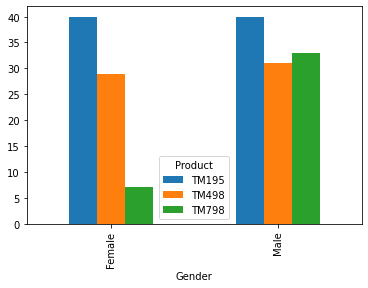

In [26]:
gen_prod = pd.crosstab(index=df['Gender'], columns=df['Product'])
plt.figure(figsize=(10,10))
ax = gen_prod.plot(kind='bar')
plt.show()

In [27]:
pd.crosstab(index=df['Gender'], columns=df['Usage'])

Usage,2,3,4,5,6,7
Gender,,,,,,
Female,20,33,14,7,2,0
Male,13,36,38,10,5,2


<Figure size 720x720 with 0 Axes>

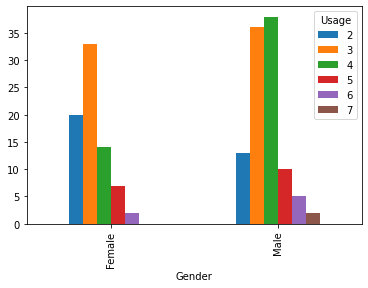

In [28]:
gen_us = pd.crosstab(index=df['Gender'], columns=df['Usage'])
plt.figure(figsize=(10,10))
ax = gen_us.plot(kind='bar')
plt.show()

In [29]:
pd.crosstab(index=df['Gender'], columns=df['Fitness'])

Fitness,1,2,3,4,5
Gender,,,,,
Female,1,16,45,8,6
Male,1,10,52,16,25


<Figure size 720x720 with 0 Axes>

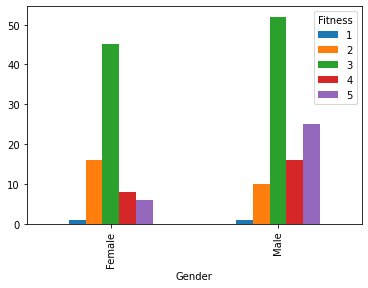

In [30]:
gen_fit = pd.crosstab(index=df['Gender'], columns=df['Fitness'])
plt.figure(figsize=(10,10))
ax = gen_fit.plot(kind='bar')
plt.show()

In [31]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [32]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 720x720 with 0 Axes>

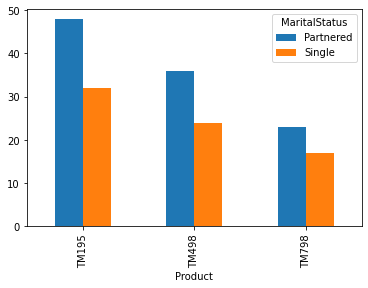

In [33]:
prod_ms = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'])
plt.figure(figsize=(10,10))
ax = prod_ms.plot(kind = 'bar')
print(ax)

In [34]:
df.Education.value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 720x720 with 0 Axes>

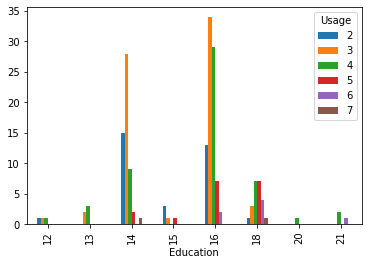

In [35]:
ed_us = pd.crosstab(index=df['Education'], columns=df['Usage'])
plt.figure(figsize=(10,10))
ax = ed_us.plot(kind = 'bar')
print(ax)

<Figure size 720x720 with 0 Axes>

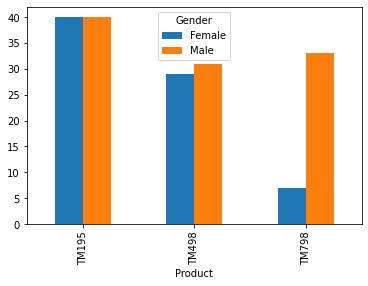

In [36]:
prod_gen = pd.crosstab(index=df['Product'], columns=df['Gender'])
plt.figure(figsize=(10,10))
prod_gen.plot(kind = 'bar')
plt.show()

<Figure size 1080x576 with 0 Axes>

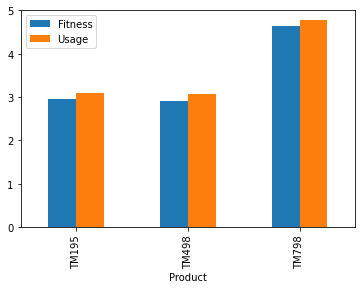

In [37]:
pivot = df.pivot_table(values = ['Usage', 'Fitness'], index=['Product'], aggfunc='mean')
plt.figure(figsize=(15,8))
pivot.plot(kind = 'bar')
plt.show()

In [38]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [39]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [40]:
df[df['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [41]:
df[df['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


In [42]:
df.quantile(q=0.5, axis=0)

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
Name: 0.5, dtype: float64

In [43]:
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [44]:
df.quantile(q=0.75, axis=0) - df.quantile(q=0.25, axis=0)

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [45]:
df['Income'].quantile(q=0.95)

90948.24999999999

In [46]:
df[df['Income'] > df['Income'].quantile(q=0.95)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
162,TM798,28,Female,18,Partnered,6,5,92131,180
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [47]:
df[df['Usage'] > df['Usage'].quantile(q=0.95)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,TM798,25,Male,18,Partnered,6,4,70966,180
155,TM798,25,Male,18,Partnered,6,5,75946,240
162,TM798,28,Female,18,Partnered,6,5,92131,180
163,TM798,28,Male,18,Partnered,7,5,77191,180
164,TM798,28,Male,18,Single,6,5,88396,150
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
175,TM798,40,Male,21,Single,6,5,83416,200


In [48]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [49]:
df['Usage'].quantile(q=0.75)

4.0

In [50]:
df[df['Usage'] > df['Usage'].quantile(q=0.75)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,TM195,21,Male,15,Single,5,4,35247,141
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
100,TM498,25,Female,14,Partnered,5,3,47754,106
123,TM498,33,Female,16,Partnered,5,3,53439,95
144,TM798,23,Female,18,Single,5,4,53536,100
148,TM798,24,Female,16,Single,5,5,52291,200
149,TM798,24,Male,16,Single,5,5,49801,160
152,TM798,25,Female,18,Partnered,5,5,61006,200
154,TM798,25,Male,18,Partnered,6,4,70966,180


In [51]:
df.pivot_table(index='Product', columns=['Gender', 'MaritalStatus'], aggfunc='mean')

Age                                   Education  \
Gender            Female                  Male                Female   
MaritalStatus  Partnered     Single  Partnered     Single  Partnered   
Product                                                                
TM195          28.333333  28.692308  31.380952  25.631579  14.888889   
TM498          30.000000  28.142857  30.380952  25.200000  15.200000   
TM798          29.000000  24.333333  30.000000  28.928571  17.500000   

                                                 Fitness            ...  \
Gender                         Male               Female            ...   
MaritalStatus     Single  Partnered     Single Partnered    Single  ...   
Product                                                             ...   
TM195          15.538462  15.428571  14.473684  2.851852  2.923077  ...   
TM498          15.214286  15.285714  14.500000  2.933333  2.785714  ...   
TM798          18.333333  17.421053  16.928571  5.000000  4.000000  ...   

                     Income                     Miles                          \
Gender                 Male                    Female                    Male   
MaritalStatus     Partnered        Single   Partnered      Single   Partnered   
Product                                                                         
TM195          50028.000000  43265.842105   74.925926   78.846154   80.190476   
TM498          49378.285714  47071.800000   94.000000   80.214286   87.238095   
TM798          81431.368421  68216.428571  215.000000  133.333333  176.315789   

                              Usage                                
Gender                       Female                Male            
MaritalStatus      Single Partnered    Single Partnered    Single  
Product                                                            
TM195           99.526316  2.851852  3.000000  3.285714  3.263158  
TM498           91.100000  3.333333  2.928571  2.857143  3.300000  
TM798          147.571429  5.250000  4.666667  4.842105  4.571429  

[3 rows x 24 columns]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

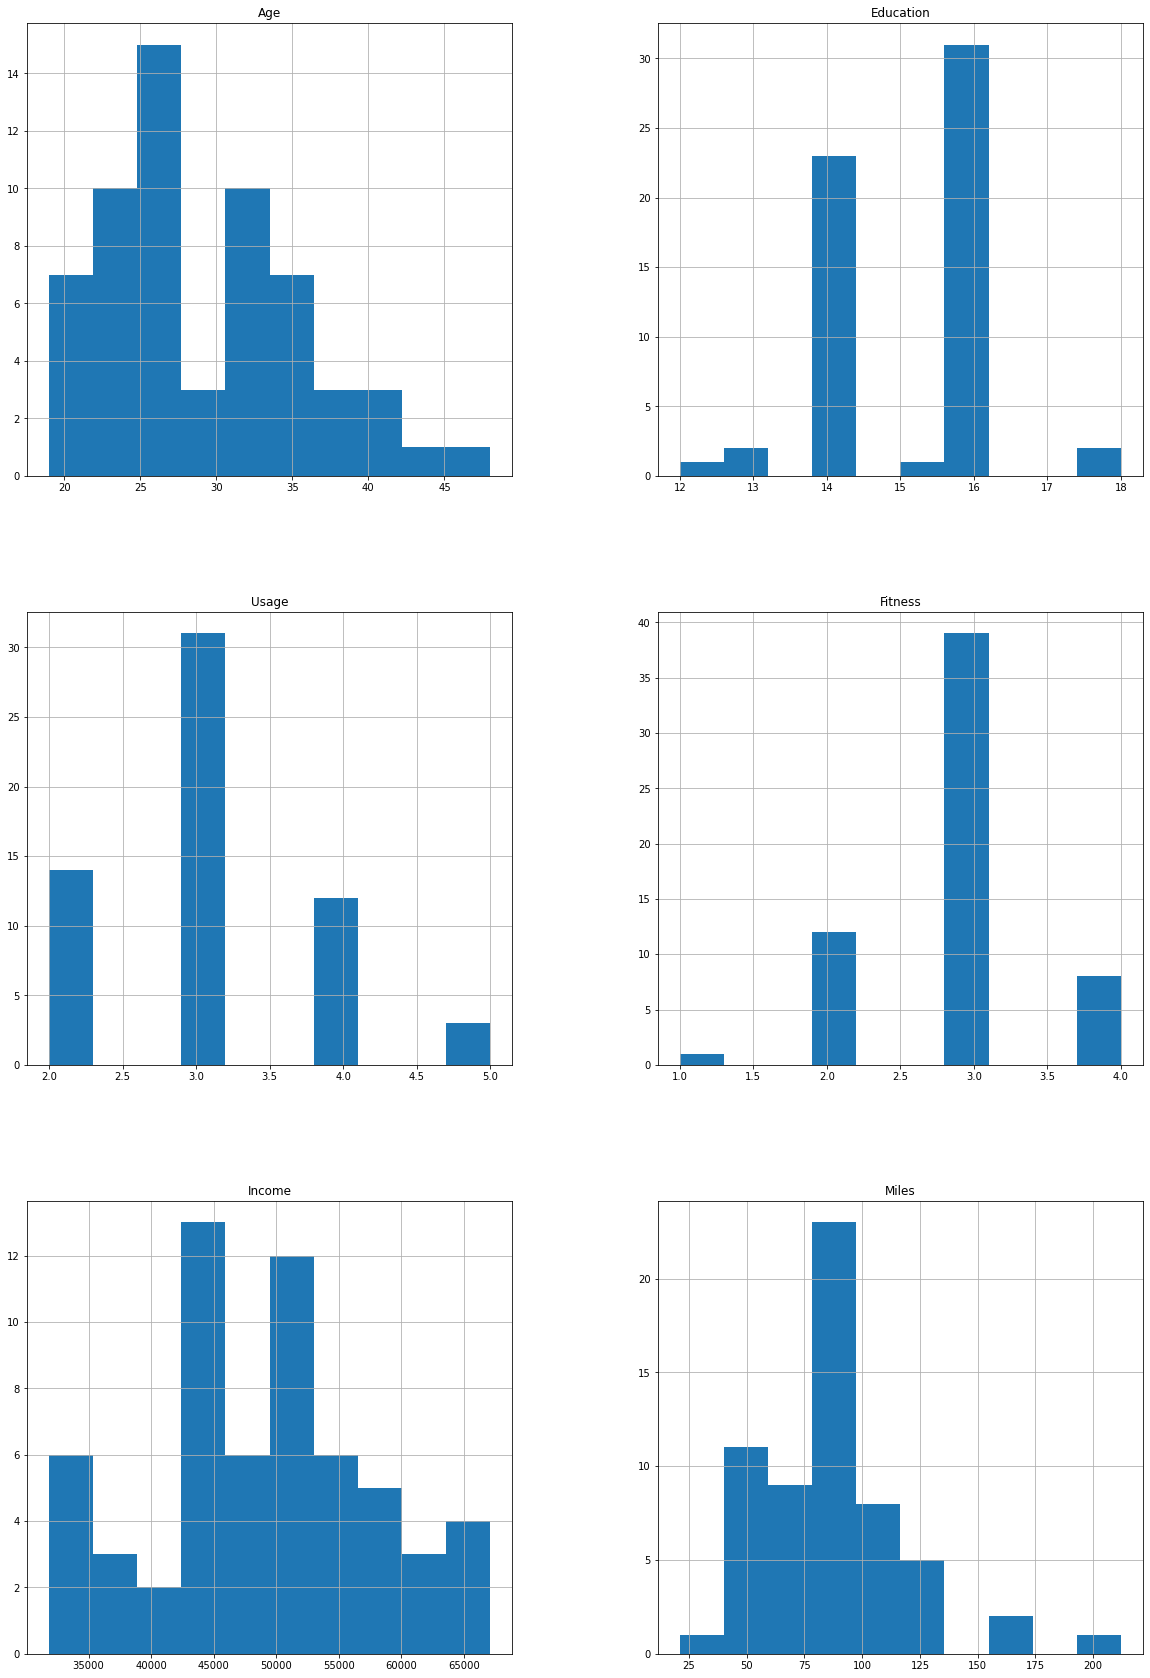

In [52]:
df[df['Product'] == 'TM498'].hist(figsize=(20,30))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

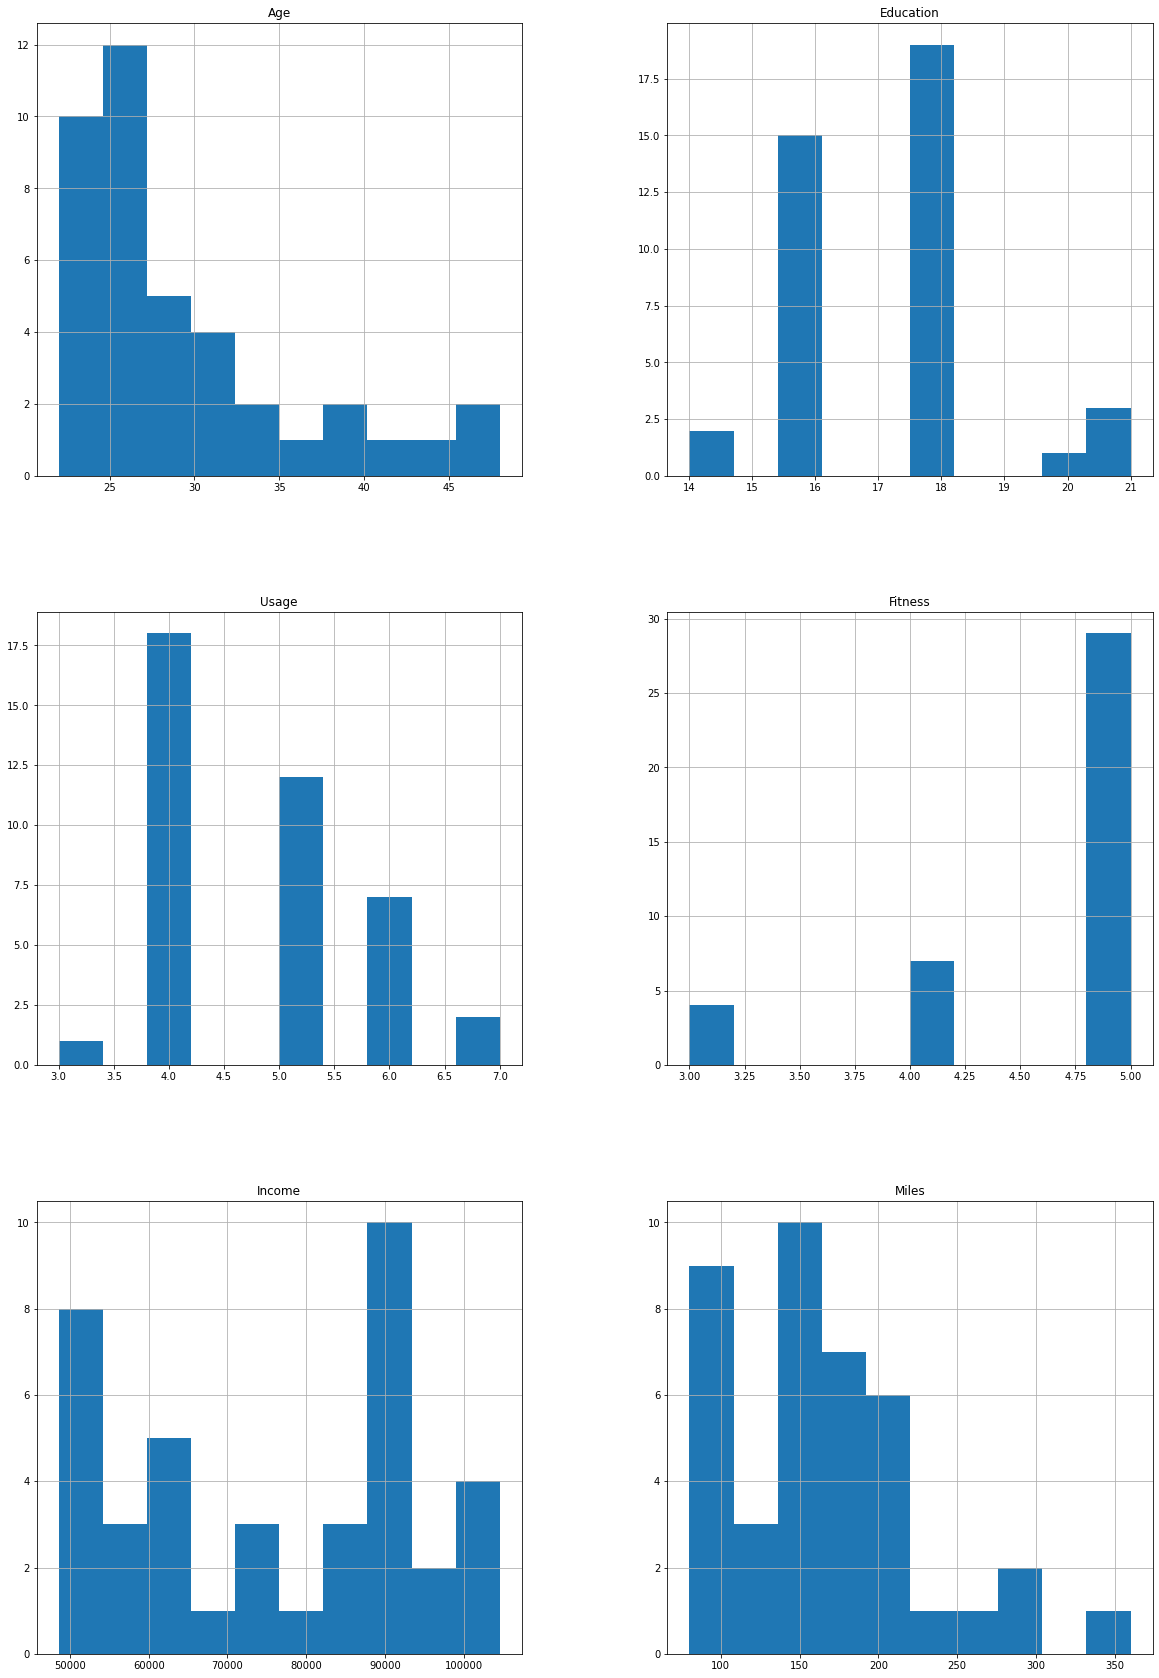

In [53]:
df[df['Product'] == 'TM798'].hist(figsize=(20,30))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

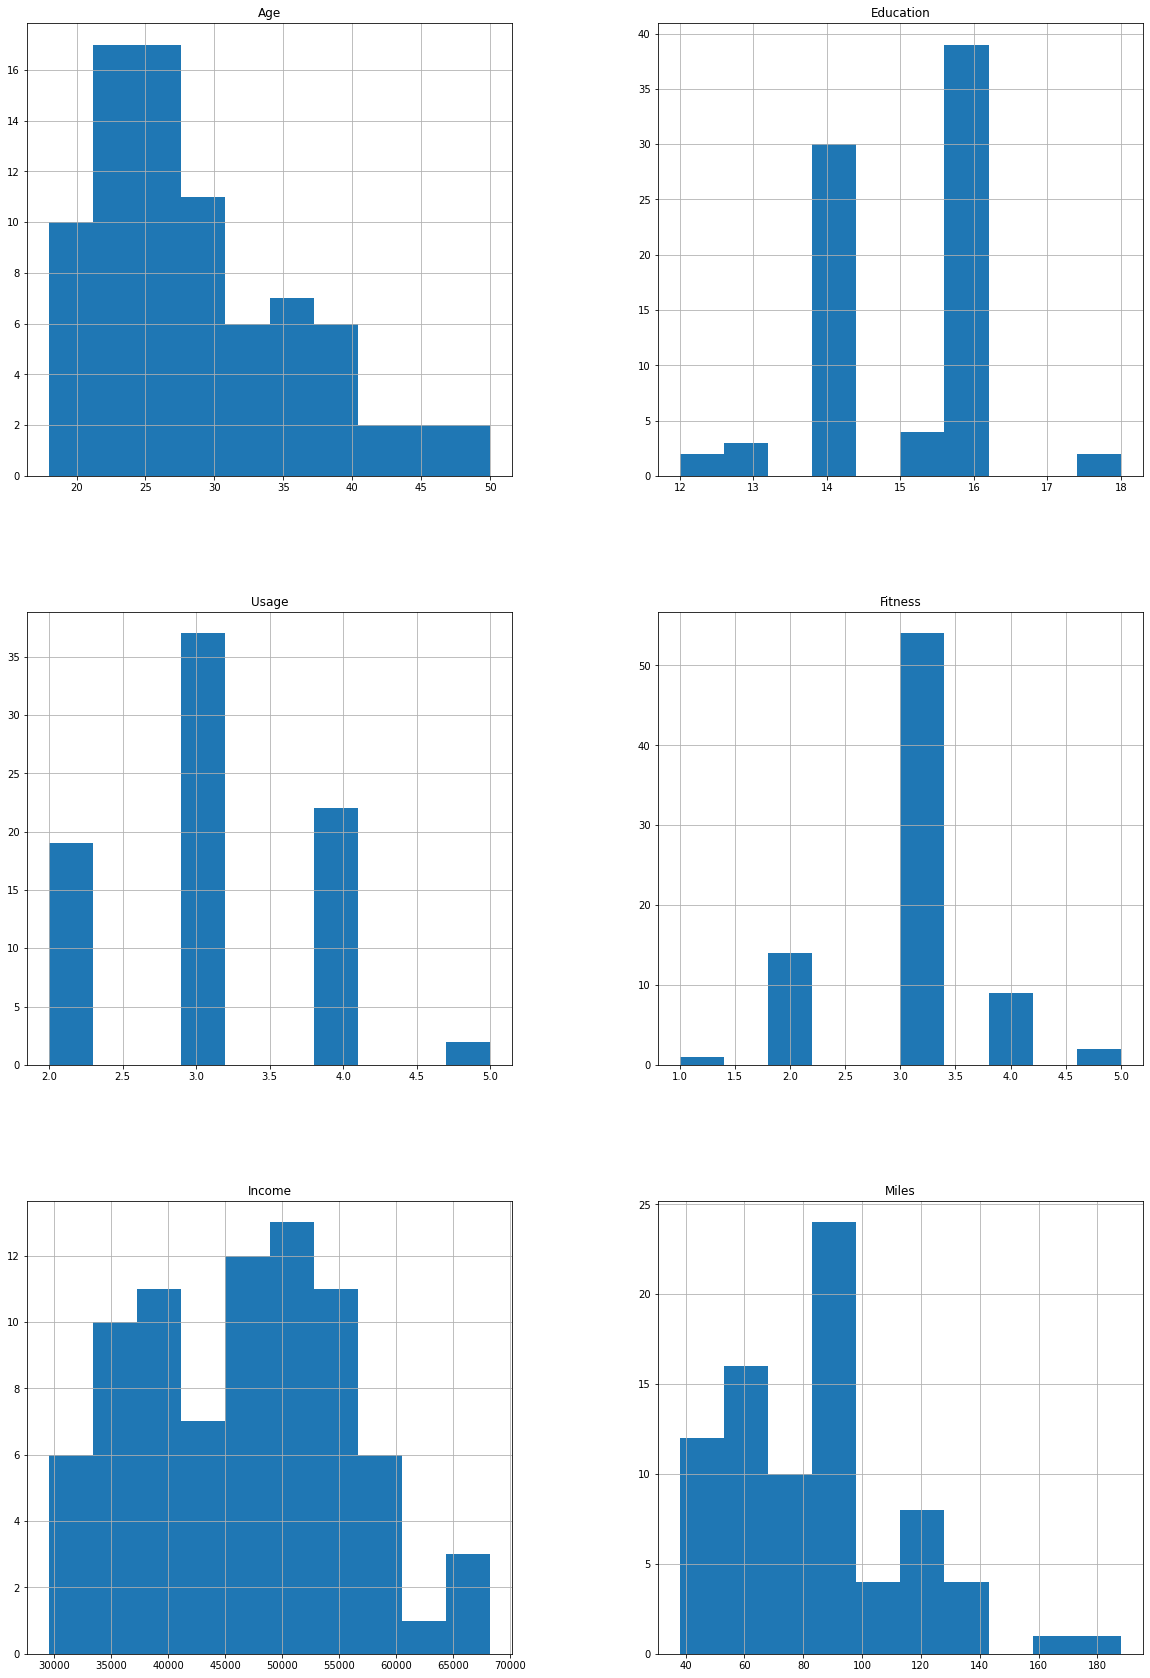

In [54]:
df[df['Product'] == 'TM195'].hist(figsize=(20,30))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

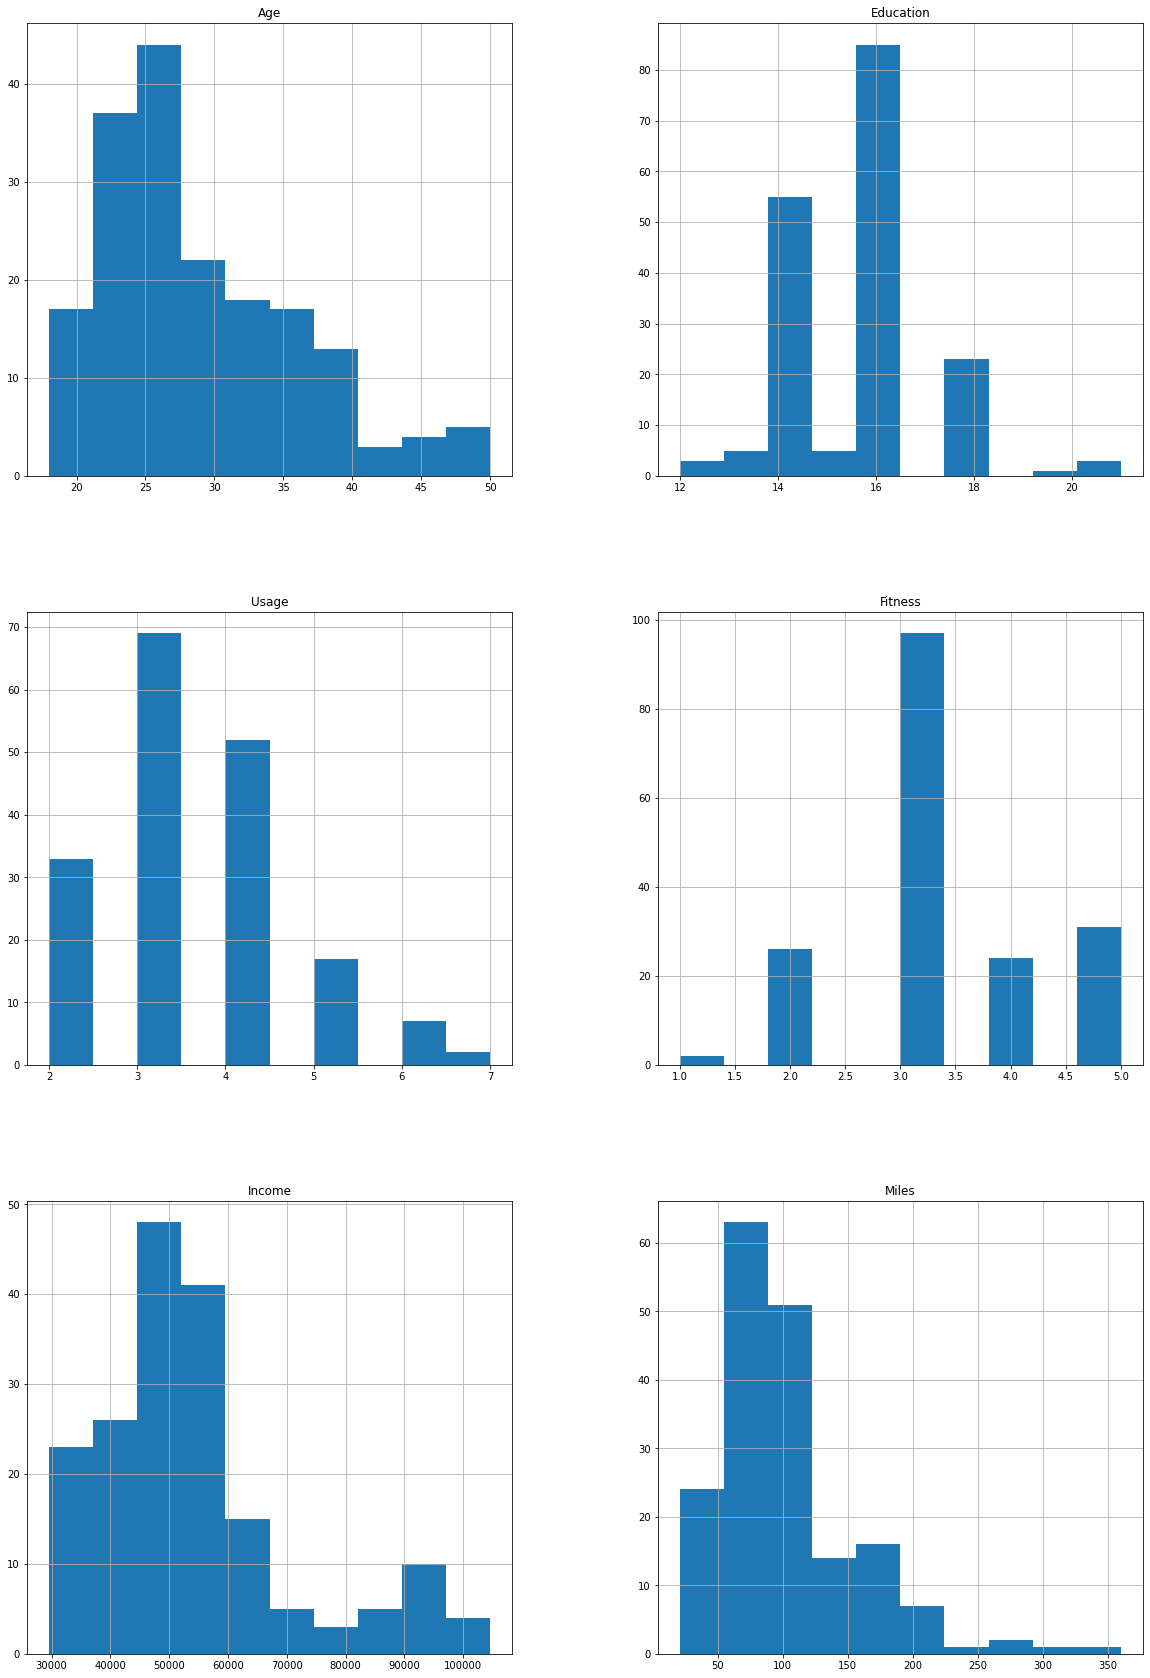

In [55]:
df.hist(figsize=(20,30))

In [56]:
col_list = df.columns
col_list

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

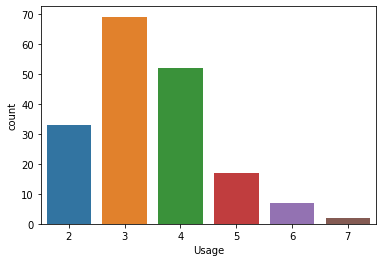

In [59]:
sns.countplot(data = df, x = 'Usage')
plt.show()

<AxesSubplot:xlabel='Product', ylabel='count'>

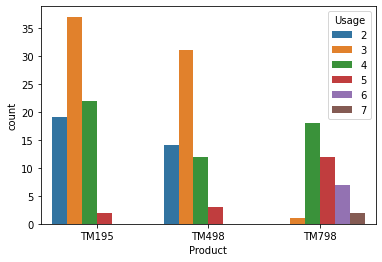

In [60]:
sns.countplot(data=df, x = 'Product', hue = 'Usage')

<AxesSubplot:xlabel='count', ylabel='Fitness'>

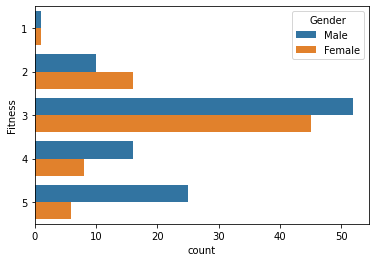

In [61]:
sns.countplot(data = df, y = 'Fitness', hue = 'Gender')

<AxesSubplot:xlabel='count', ylabel='Usage'>

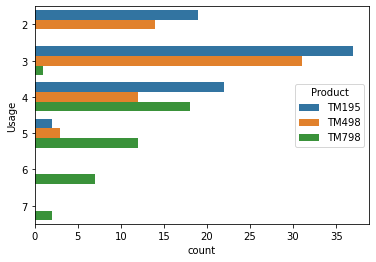

In [62]:
sns.countplot(data = df, y = 'Usage', hue='Product')

<AxesSubplot:xlabel='count', ylabel='Fitness'>

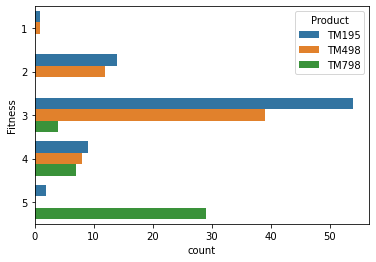

In [63]:
sns.countplot(data = df, y = 'Fitness', hue='Product')

In [64]:
# for i in col_list:
#     sns.boxplot(df[i])

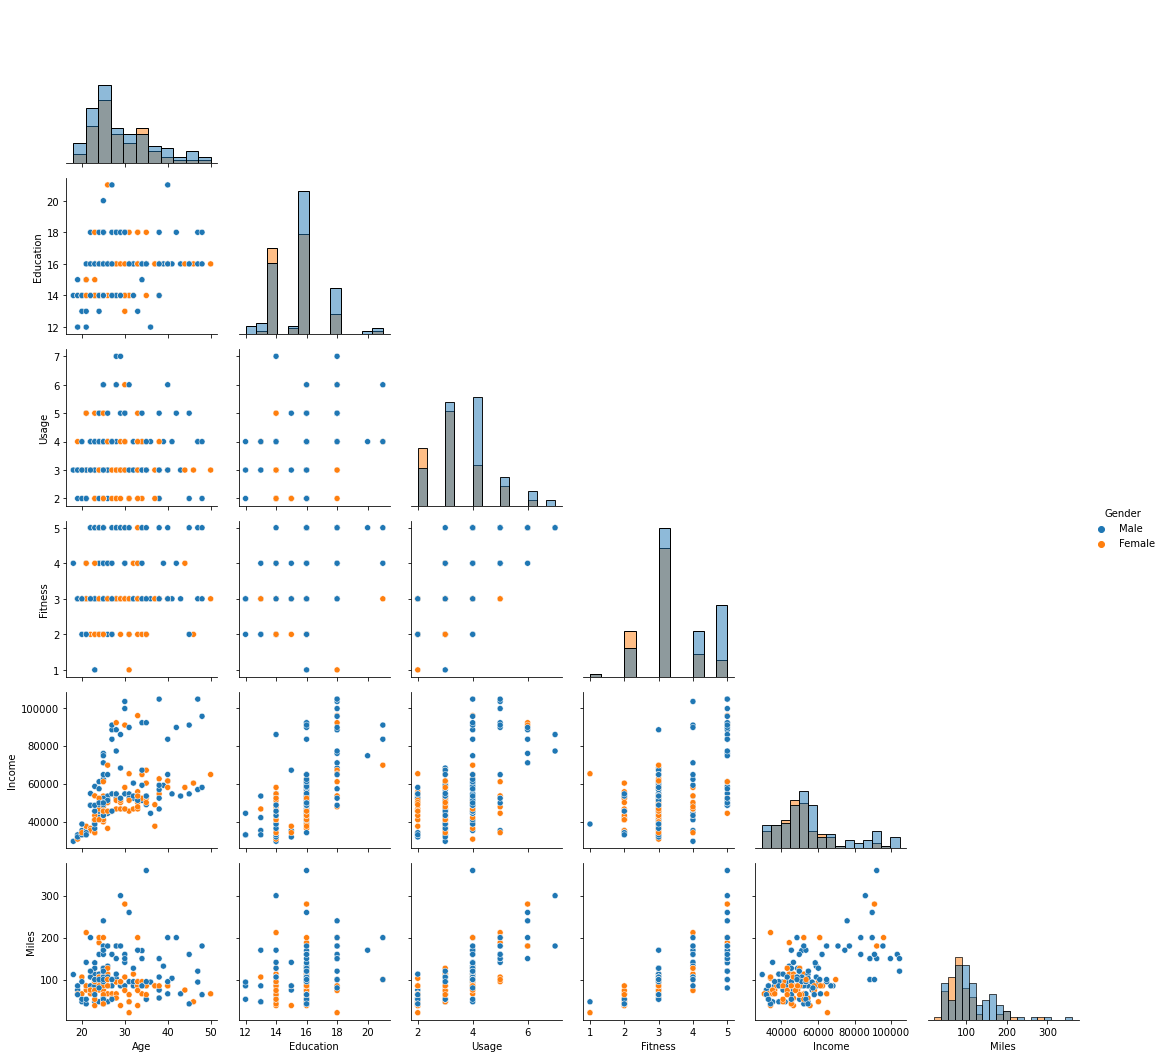

In [65]:
g = sns.PairGrid(df, hue="Gender", corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='count', ylabel='Product'>

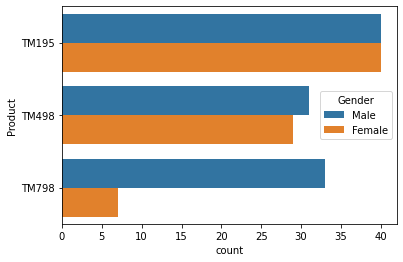

In [66]:
sns.countplot(y="Product", hue="Gender", data=df)

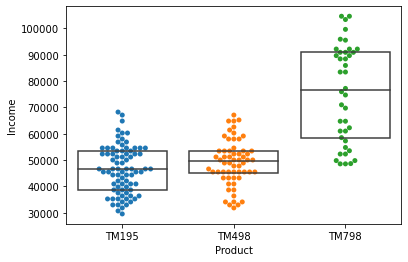

In [67]:
ax = sns.swarmplot(x="Product", y="Income", data=df, zorder=0)
# plot boxplot
sns.boxplot(x="Product", y="Income", data=df,
                 showcaps=False,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0}, ax=ax)

plt.show()

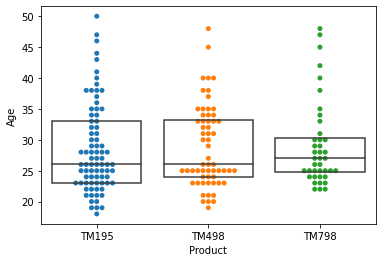

In [68]:
ax = sns.swarmplot(x="Product", y="Age", data=df, zorder=0)
# plot boxplot
sns.boxplot(x="Product", y="Age", data=df, 
                 showcaps=False,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0}, ax=ax)

plt.show()

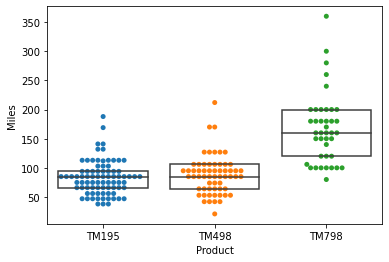

In [69]:
ax = sns.swarmplot(x="Product", y="Miles", data=df, zorder=0)
# plot boxplot
sns.boxplot(x="Product", y="Miles", data=df, 
                 showcaps=False,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0}, ax=ax)

plt.show()

In [71]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

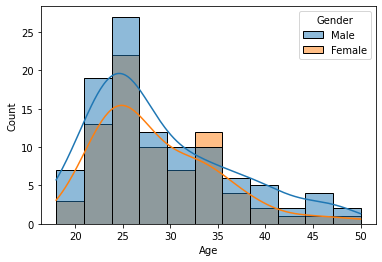

In [72]:
sns.histplot(x='Age', data=df, kde=True, hue='Gender')
df['Age'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

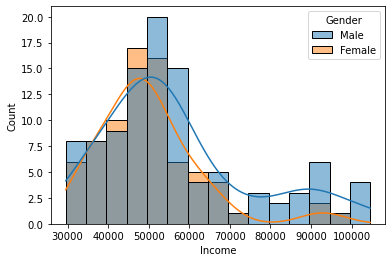

In [73]:
sns.histplot(x='Income', data=df, kde=True, hue='Gender')
df['Income'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

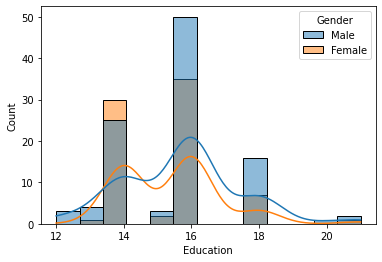

In [74]:
sns.histplot(x='Education', data=df, kde=True, hue='Gender')
df['Education'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

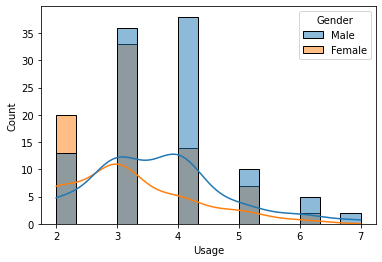

In [75]:
sns.histplot(x='Usage', data=df, kde=True, hue='Gender')
df['Usage'].describe()

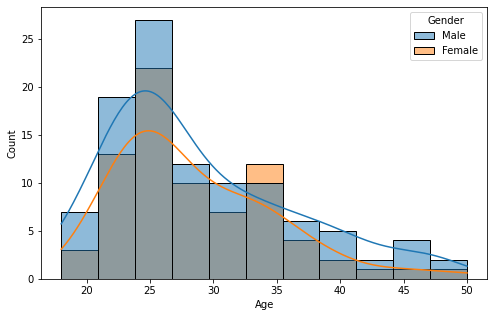

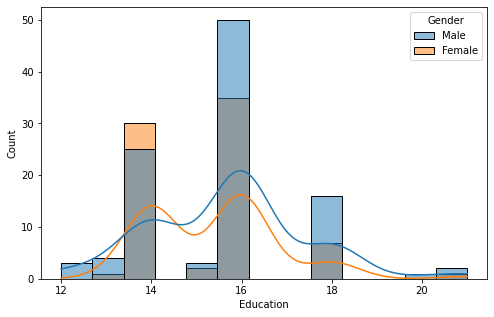

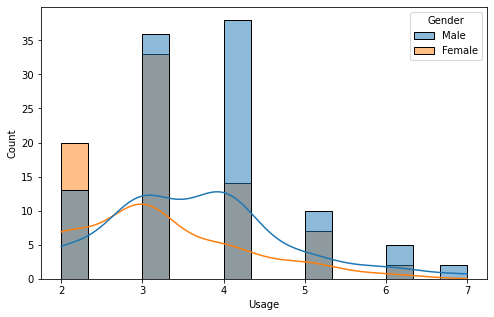

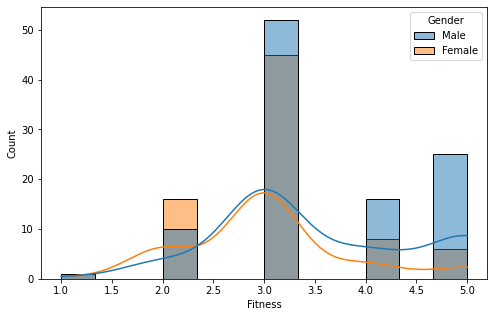

In [76]:
# trying to loop through to make charts
my_list = [df['Age'], df['Education'], df['Usage'], df['Fitness']]

for col in my_list:
    plt.figure(figsize=(8,5))
    sns.histplot(x=col, data=df, kde=True, hue='Gender')

/Users/franksellhausen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


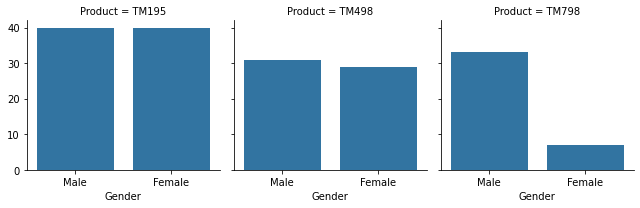

In [77]:
g = sns.FacetGrid(df, col="Product")
g.map(sns.countplot, "Gender")

In [78]:
df['Income'].quantile(q=0.8)

61398.0

In [79]:
df['Usage'].quantile(q=0.8)

4.0

In [80]:
df[(df['Income'] > df['Income'].quantile(q=.8)) | (df['Usage'] > df['Usage'].quantile(q=.8))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,TM195,21,Male,15,Single,5,4,35247,141
23,TM195,24,Female,16,Partnered,5,5,44343,188
50,TM195,29,Male,18,Partnered,3,3,68220,85
65,TM195,35,Female,18,Single,3,3,67083,85
79,TM195,50,Female,16,Partnered,3,3,64809,66
84,TM498,21,Female,14,Partnered,5,4,34110,212
100,TM498,25,Female,14,Partnered,5,3,47754,106
117,TM498,31,Female,18,Single,2,1,65220,21
123,TM498,33,Female,16,Partnered,5,3,53439,95
125,TM498,34,Female,16,Partnered,4,3,64809,95


In [81]:
premium = df[(df['Income'] > df['Income'].quantile(q=.8)) | (df['Usage'] > df['Usage'].quantile(q=.8))]

In [82]:
len(premium)

45

In [83]:
premium.index

Int64Index([  8,  23,  50,  65,  79,  84, 100, 117, 123, 125, 127, 133, 137,
            144, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
            161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
            174, 175, 176, 177, 178, 179],
           dtype='int64')

In [84]:
np.any(df['Income'] > 1_000_000)

False

In [85]:
np.add.reduce(df['Usage'])

622

In [86]:
np.add.reduce(df['Miles'])

18575

In [87]:
df.index

RangeIndex(start=0, stop=180, step=1)

In [88]:
corr = df.corr(method='pearson')
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


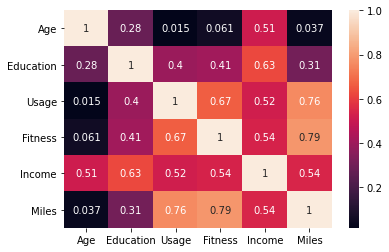

In [89]:
sns.heatmap(corr, annot=True)
plt.show()

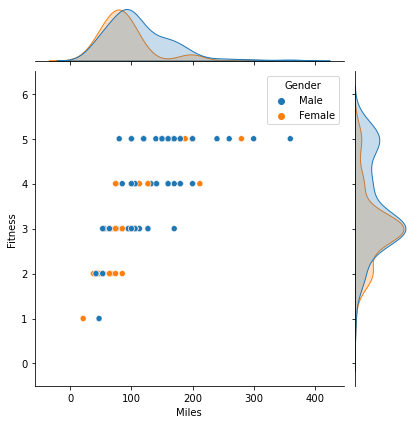

In [90]:
sns.jointplot(data=df, x='Miles', y='Fitness', hue='Gender')

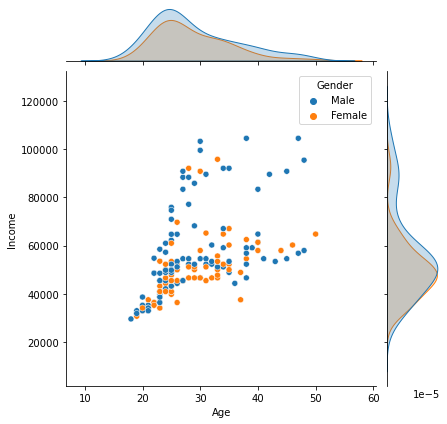

In [91]:
sns.jointplot(data=df, x='Age', y='Income', hue='Gender')

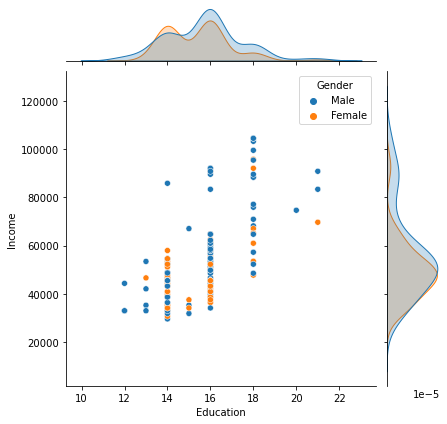

In [92]:
sns.jointplot(data=df, x='Education', y='Income', hue='Gender')

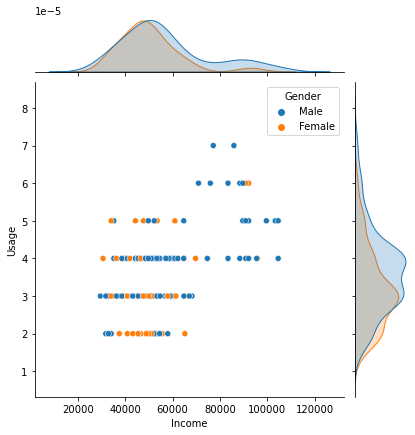

In [93]:
sns.jointplot(data=df, x='Income', y='Usage', hue='Gender')

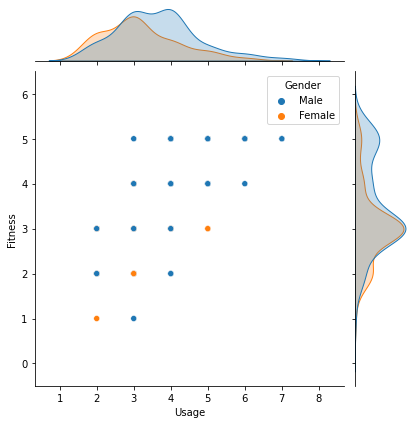

In [94]:
sns.jointplot(data=df, x='Usage', y='Fitness', hue='Gender')

<AxesSubplot:xlabel='Miles', ylabel='Fitness'>

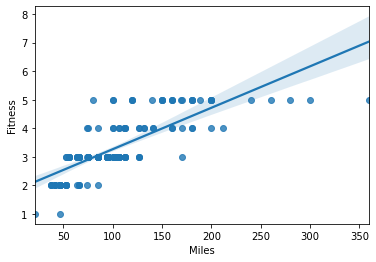

In [95]:
sns.regplot(data=df, x='Miles', y='Fitness')

<AxesSubplot:ylabel='Density'>

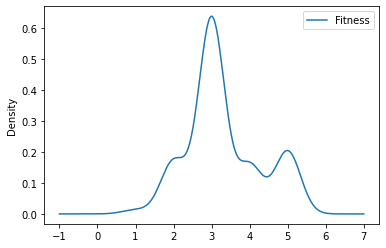

In [96]:
df.plot(y='Fitness', kind='kde')

In [97]:
#df_merge_all['age_group']=pd.cut(df_merge_all.age, bins=(0,20,40,55,100),
#            labels=('Teenager','Adult','Middle Age','Elderly'))

In [98]:
df['Fitness Category'] = pd.qcut(df['Fitness'], 2, labels=['Below Median', 'Above Median'], duplicates='drop')

In [99]:
df['Usage Category'] = pd.qcut(df['Usage'], 3, labels=['Low', "Medium", "High"], duplicates='drop')

In [100]:
df['Miles Category'] = pd.qcut(df['Miles'], 3, labels=['Low', "Medium", "High"])

In [101]:
df['Income Category'] = pd.qcut(df['Income'], 3, labels=['Low', "Medium", "High"])

In [102]:
df.head(25)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Category,Usage Category,Miles Category,Income Category
0,TM195,18,Male,14,Single,3,4,29562,112,Above Median,Low,High,Low
1,TM195,19,Male,15,Single,2,3,31836,75,Below Median,Low,Low,Low
2,TM195,19,Female,14,Partnered,4,3,30699,66,Below Median,Medium,Low,Low
3,TM195,19,Male,12,Single,3,3,32973,85,Below Median,Low,Medium,Low
4,TM195,20,Male,13,Partnered,4,2,35247,47,Below Median,Medium,Low,Low
5,TM195,20,Female,14,Partnered,3,3,32973,66,Below Median,Low,Low,Low
6,TM195,21,Female,14,Partnered,3,3,35247,75,Below Median,Low,Low,Low
7,TM195,21,Male,13,Single,3,3,32973,85,Below Median,Low,Medium,Low
8,TM195,21,Male,15,Single,5,4,35247,141,Above Median,High,High,Low
9,TM195,21,Female,15,Partnered,2,3,37521,85,Below Median,Low,Medium,Low


<AxesSubplot:xlabel='Usage Category', ylabel='Count'>

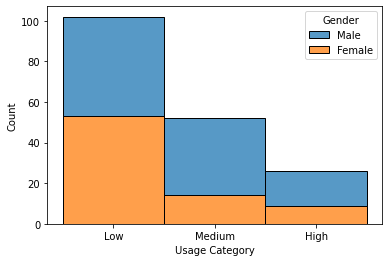

In [103]:
sns.histplot(df, x='Usage Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Miles Category', ylabel='Count'>

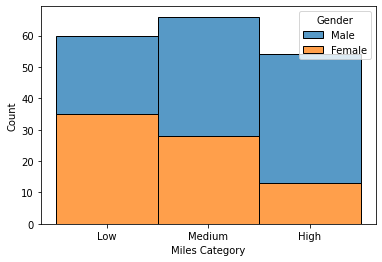

In [104]:
sns.histplot(df, x='Miles Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Fitness Category', ylabel='Count'>

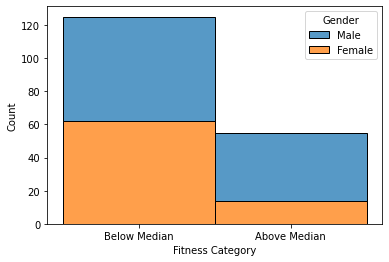

In [105]:
sns.histplot(df, x='Fitness Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Income Category', ylabel='Count'>

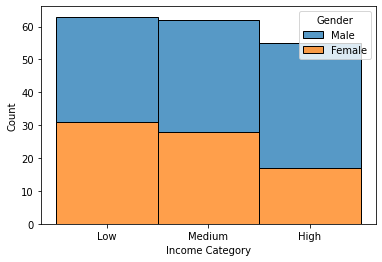

In [106]:
sns.histplot(df, x='Income Category', hue='Gender', multiple='stack')

In [107]:
df.pivot_table(index='Product', columns='Usage Category', values='Fitness')

Usage Category,Low,Medium,High
Product,,,
TM195,2.821429,3.181818,4.500000
TM498,2.822222,3.083333,3.333333
TM798,5.000000,4.444444,4.761905


In [108]:
print(df[df['Product'] == "TM498"]['Fitness'].max())
print(df[df['Product'] == "TM195"]['Fitness'].max())
print(df[df['Product'] == "TM798"]['Fitness'].max())

4
5
5


In [109]:
# curious to know which product categories have most people self-rating '5' for fitness
df_5rated = df[df['Fitness'] == 5]
df_5rated.groupby(by='Product')['Fitness'].count()

Product
TM195     2
TM798    29
Name: Fitness, dtype: int64

In [110]:
df.groupby(by='Product').mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [111]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [112]:
df_5rated[df_5rated['Product'] == 'TM798'].count() / df[df['Product'] == 'TM798']['Product'].count()

Product             0.725
Age                 0.725
Gender              0.725
Education           0.725
MaritalStatus       0.725
Usage               0.725
Fitness             0.725
Income              0.725
Miles               0.725
Fitness Category    0.725
Usage Category      0.725
Miles Category      0.725
Income Category     0.725
dtype: float64

In [113]:

## df pivot practice

dfplay = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [114]:
dfplay.head()

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w


In [115]:
dfplay.pivot(index='bar', columns='zoo', values='baz')

zoo,q,t,w,x,y,z
bar,,,,,,
A,4.0,NaN,NaN,1.0,NaN,NaN
B,NaN,NaN,5.0,NaN,2.0,NaN
C,NaN,6.0,NaN,NaN,NaN,3.0
